In [9]:
# Load Accepts CSV, will use Rejects CSV for Reject inference in later steps

import pandas as pd
import numpy as np
Accepts = pd.read_csv("accepted_customers.csv").drop('NAT', axis = 1)
Accepts

,CHILDREN,PERS_H,AGE,TMADD,TMJOB1,TEL,NMBLOAN,FINLOAN,INCOME,EC_CARD,...,REGN,DIV,CASH,PRODUCT,RESID,PROF,CAR,CARDS,GB,_freq_
0,0,2,51,3,999,2,0,0,1000,1,...,2,1,1300,Furniture or Carpet,Lease,Others,Car,Cheque card,0,30
1,1,2,55,60,999,2,2,0,2900,0,...,2,1,900,Furniture or Carpet,Owner,Others,Car,no credit cards,0,30
2,0,1,50,72,999,2,2,0,2300,0,...,0,0,1100,Radio or TV or Hifi,Lease,Others,Without Vehicle,no credit cards,0,30
3,0,2,56,96,999,2,2,1,4000,0,...,0,0,7000,Furniture or Carpet,Lease,Civil Service,Car,no credit cards,0,30
4,0,1,52,120,999,2,0,0,0,1,...,0,0,1200,Furniture or Carpet,Lease,Others,Car,Cheque card,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,1,23,288,3,1,0,0,0,1,...,0,0,600,Radio or TV or Hifi,Lease,Others,Car,Cheque card,1,1
2996,0,1,26,312,3,2,0,1,2000,0,...,2,1,700,Radio or TV or Hifi,NaN,Others,Car,no credit cards,1,1
2997,1,2,36,12,0,2,0,0,1900,0,...,2,1,1200,Furniture or Carpet,NaN,Pensioner,Car,no credit cards,1,1
2998,0,1,28,24,0,1,0,0,1800,1,...,5,1,600,Dept. Store or Mail,NaN,Others,Car,Cheque card,1,1


In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(Accepts, test_size = 0.3, random_state = 7)
train

,CHILDREN,PERS_H,AGE,TMADD,TMJOB1,TEL,NMBLOAN,FINLOAN,INCOME,EC_CARD,...,REGN,DIV,CASH,PRODUCT,RESID,PROF,CAR,CARDS,GB,_freq_
1283,0,1,30,144,15,1,0,0,0,1,...,0,0,700,Dept. Store or Mail,Lease,Others,Car,Cheque card,0,30
1888,0,1,30,6,60,2,0,1,10000,1,...,5,1,1400,Cars,Lease,Self-employed pe,Car,Cheque card,1,1
1454,2,4,31,84,6,2,0,1,1500,0,...,0,0,1400,Radio or TV or Hifi,NaN,Civil Service,Without Vehicle,no credit cards,0,30
1523,4,6,44,48,288,2,2,0,1700,0,...,0,0,1700,Radio or TV or Hifi,NaN,Others,Car,no credit cards,1,1
1696,0,2,49,312,120,2,0,0,1500,0,...,9,1,600,Radio or TV or Hifi,Lease,Others,Car,no credit cards,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,2,4,33,9,168,2,1,1,2900,0,...,2,1,1300,Furniture or Carpet,Lease,Others,Car,no credit cards,1,1
2550,0,1,22,288,18,2,2,0,0,1,...,0,0,1700,Radio or TV or Hifi,Lease,Others,Without Vehicle,Cheque card,1,1
537,1,3,37,96,84,1,0,0,2600,1,...,0,0,1000,Dept. Store or Mail,NaN,Civil Service,Without Vehicle,Cheque card,0,30
1220,0,1,21,36,18,2,2,1,0,0,...,6,1,1500,Furniture or Carpet,Lease,Others,Without Vehicle,Mastercard/Euroc,0,30


In [11]:
# Potentially a few outliers: 999 for TMADD/TMJOB1, 100000 for INCOME, 100000 for CASH, nans in PRODUCT/RESID/PROF
# Replace nan with "MISSING"
unique_values = {col: train[col].unique() for col in train.columns}

# Display unique values
for col, values in unique_values.items():
    print(f"Unique values in '{col}': {values}")

Unique values in 'CHILDREN': [ 0  2  4  1  3 23  5  8  6]
Unique values in 'PERS_H': [ 1  4  6  2  3  5 25  7 10  8]
Unique values in 'AGE': [30 31 44 49 55 23 45 19 34 29 36 53 50 20 22 57 43 27 41 26 21 38 35 28
 25 39 52 48 24 59 40 37 32 33 47 51 46 42 60 63 56 62 66 54 58 68 67 64
 65 69 71 18 61 70]
Unique values in 'TMADD': [144   6  84  48 312 264   3  24  42  36  96  21  30 240 168 216 108  18
  66 288 336 192 120   0  54   9  15  72 999  60  12 360]
Unique values in 'TMJOB1': [ 15  60   6 288 120  12  21  24 144 108  45  33  72  27  18  48 240   9
  66 216 192  54  84 336 168  36  42   3  30  96  39 999   0]
Unique values in 'TEL': [1 2 0]
Unique values in 'NMBLOAN': [0 2 1]
Unique values in 'FINLOAN': [0 1]
Unique values in 'INCOME': [     0  10000   1500   1700   2200   3000   1000   2700   3200   3500
   2100   2800   2000   1900   2300   2500   1800   3300   2900   1600
   4000   5000   2400   2600   3400   3100 100000]
Unique values in 'EC_CARD': [1 0]
Unique values in '

In [12]:
from optbinning import BinningProcess
from sklearn.linear_model import LogisticRegression
from optbinning import Scorecard
colnames = list(train.columns[0:21])
print(colnames)
X = train[colnames]
y = train["GB"]
selection_criteria = {"iv": {"min": 0.1, "max": 1}}

special_codes = [999, None]
bin_proc = BinningProcess(colnames, selection_criteria = selection_criteria, categorical_variables = ["BUREAU", "CAR", "CARDS", "DIV", "EC_CARD", "FINLOAN", "LOCATION",
"PRODUCT", "PROF", "REGN", "RESID", "TEL", "CHILDREN"], special_codes = special_codes)

iv_all = bin_proc.fit(X, y).summary()

iv_all[iv_all.columns[0:6]].sort_values(by = ["iv"], ascending = False)

estimator = LogisticRegression(solver = "lbfgs")

scorecard = Scorecard(binning_process = bin_proc,
                      estimator = estimator, scaling_method = "pdo_odds",
                      scaling_method_params = {"pdo": 50, 
                      "scorecard_points": 500, "odds": 20})
                      
scorecard.fit(X, y, sample_weight = train["_freq_"])
scorecard.table(style = "detailed")

['CHILDREN', 'PERS_H', 'AGE', 'TMADD', 'TMJOB1', 'TEL', 'NMBLOAN', 'FINLOAN', 'INCOME', 'EC_CARD', 'BUREAU', 'LOCATION', 'LOANS', 'REGN', 'DIV', 'CASH', 'PRODUCT', 'RESID', 'PROF', 'CAR', 'CARDS']


,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,PERS_H,0,"(-inf, 1.50)",9347,0.287158,8850,497,0.053172,-0.521615,0.100349,0.012403,-0.339906,75.428601
1,PERS_H,1,"[1.50, 2.50)",8188,0.251551,8010,178,0.021739,0.405465,0.034368,0.004267,-0.339906,98.159718
2,PERS_H,2,"[2.50, 4.50)",12702,0.390230,12390,312,0.024563,0.280444,0.026976,0.003361,-0.339906,95.094329
3,PERS_H,3,"[4.50, inf)",2313,0.071060,2250,63,0.027237,0.174353,0.001993,0.000249,-0.339906,92.493078
4,PERS_H,4,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.339906,88.218098
5,PERS_H,5,Missing,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.339906,88.218098
0,AGE,0,"(-inf, 22.50)",1957,0.060123,1770,187,0.095554,-1.153571,0.140626,0.016664,-0.691748,30.656003
1,AGE,1,"[22.50, 24.50)",2017,0.061966,1890,127,0.062965,-0.701052,0.042731,0.005235,-0.691748,53.236258
2,AGE,2,"[24.50, 27.50)",3415,0.104916,3240,175,0.051245,-0.482655,0.030798,0.003813,-0.691748,64.134089
3,AGE,3,"[27.50, 30.50)",3669,0.112719,3540,129,0.035159,-0.089128,0.000934,0.000117,-0.691748,83.770708


In [13]:
X_test = test[list(test.columns[0:21])]
X_test

,CHILDREN,PERS_H,AGE,TMADD,TMJOB1,TEL,NMBLOAN,FINLOAN,INCOME,EC_CARD,...,LOCATION,LOANS,REGN,DIV,CASH,PRODUCT,RESID,PROF,CAR,CARDS
1306,0,1,31,3,12,2,2,1,2100,0,...,1,1,4,1,4000,Furniture or Carpet,Lease,Others,Car,no credit cards
2037,0,1,26,0,45,2,1,1,0,0,...,1,3,3,1,600,Radio or TV or Hifi,Lease,Others,Car,VISA mybank
568,0,1,45,24,72,2,0,1,0,1,...,1,1,3,1,900,Radio or TV or Hifi,Lease,Others,Car,Cheque card
1897,1,2,26,36,60,1,0,0,1500,0,...,1,0,0,0,2500,Radio or TV or Hifi,Lease,Others,Without Vehicle,no credit cards
2498,2,3,58,999,21,2,0,1,2700,0,...,1,0,7,1,1500,Cars,Lease,Others,Car,no credit cards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,1,3,54,168,999,2,0,0,0,1,...,1,3,5,1,4000,Cars,Lease,Others,Car,Cheque card
2237,3,5,38,48,33,2,2,1,2000,0,...,1,0,0,0,1200,Radio or TV or Hifi,Lease,Civil Service,Car,no credit cards
1721,3,5,46,144,108,2,1,1,2400,0,...,1,1,2,1,500,Radio or TV or Hifi,Lease,Others,Without Vehicle,no credit cards
1730,0,2,55,999,108,2,0,0,2100,0,...,1,3,2,1,1500,Furniture or Carpet,Owner,Others,Car,no credit cards


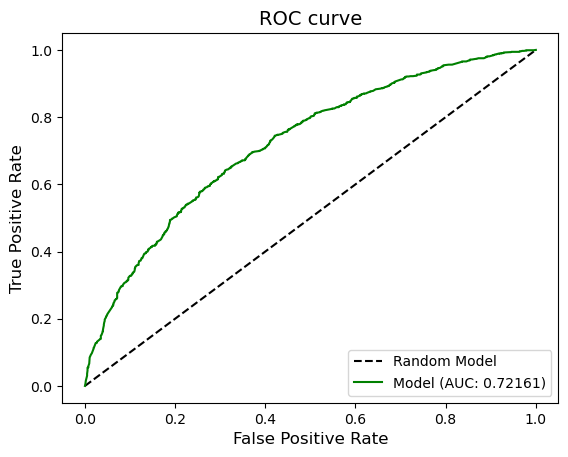

In [14]:
from matplotlib import pyplot as plt
from optbinning.scorecard import plot_auc_roc, plot_ks

y_pred_train = scorecard.predict_proba(X)[:, 1]

plot_auc_roc(train["GB"], y_pred_train)

plt.show()

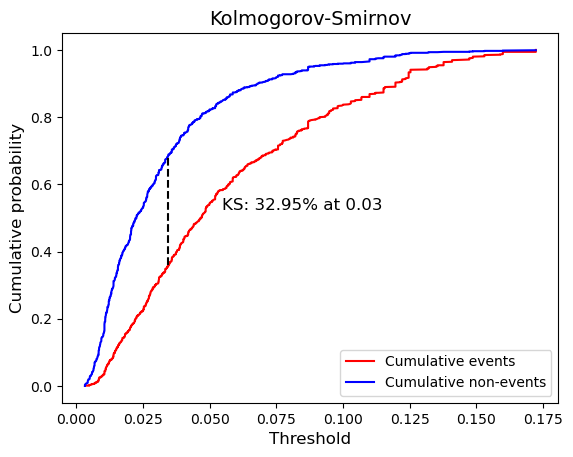

In [15]:
plot_ks(train["GB"], y_pred_train)

plt.show()

In [16]:
rejects = pd.read_csv("rejected_customers.csv")
X_r = rejects

rejects["y_pred"] = scorecard.predict_proba(X_r)[:, 1]

rejects["GB"] = (rejects["y_pred"] > 0.03).astype(int)
rejects["_freq_"] = rejects["GB"].apply(lambda x: 30 if x == 0 else 1)

rejects = rejects.drop("y_pred", axis=1)

comb_hard = pd.concat([Accepts, rejects.head(1000)], ignore_index=True)
comb_hard = comb_hard.drop('NAT', axis =1)
comb_hard

,CHILDREN,PERS_H,AGE,TMADD,TMJOB1,TEL,NMBLOAN,FINLOAN,INCOME,EC_CARD,...,REGN,DIV,CASH,PRODUCT,RESID,PROF,CAR,CARDS,GB,_freq_
0,0,2,51,3,999,2,0,0,1000,1,...,2,1,1300,Furniture or Carpet,Lease,Others,Car,Cheque card,0,30
1,1,2,55,60,999,2,2,0,2900,0,...,2,1,900,Furniture or Carpet,Owner,Others,Car,no credit cards,0,30
2,0,1,50,72,999,2,2,0,2300,0,...,0,0,1100,Radio or TV or Hifi,Lease,Others,Without Vehicle,no credit cards,0,30
3,0,2,56,96,999,2,2,1,4000,0,...,0,0,7000,Furniture or Carpet,Lease,Civil Service,Car,no credit cards,0,30
4,0,1,52,120,999,2,0,0,0,1,...,0,0,1200,Furniture or Carpet,Lease,Others,Car,Cheque card,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,1,25,9,33,2,0,0,1800,0,...,4,1,500,"Furniture,Carpet",Lease,Others,Without Vehicle,no credit cards,1,1
3996,3,5,38,42,24,2,0,0,2500,0,...,4,1,2500,"Furniture,Carpet",Lease,Others,Without Vehicle,no credit cards,1,1
3997,0,1,25,30,9,2,0,1,2500,0,...,9,1,1500,"Radio, TV, Hifi",Lease,Others,Car,no credit cards,1,1
3998,2,4,44,72,3,1,0,0,3000,0,...,8,1,1500,"Radio, TV, Hifi",Lease,Others,Car,no credit cards,1,1


In [17]:
final_train, final_val = train_test_split(comb_hard, test_size = 0.3, random_state = 7)

final_colnames = list(final_train.columns[0:21])
print(final_colnames)
final_X = final_train[final_colnames]
final_y = final_train["GB"]
selection_criteria = {"iv": {"min": 0.1, "max": 1}}

special_codes = [999, None]


['CHILDREN', 'PERS_H', 'AGE', 'TMADD', 'TMJOB1', 'TEL', 'NMBLOAN', 'FINLOAN', 'INCOME', 'EC_CARD', 'BUREAU', 'LOCATION', 'LOANS', 'REGN', 'DIV', 'CASH', 'PRODUCT', 'RESID', 'PROF', 'CAR', 'CARDS']


In [18]:
final_bin_proc = BinningProcess(final_colnames, selection_criteria = selection_criteria, categorical_variables = ["BUREAU", "CAR", "CARDS", "DIV", "EC_CARD", "FINLOAN", "LOCATION",
"PRODUCT", "PROF", "REGN", "RESID", "TEL", "CHILDREN"], special_codes = special_codes)

final_iv_all = final_bin_proc.fit(final_X, final_y).summary()

final_iv_all[final_iv_all.columns[0:6]].sort_values(by = ["iv"], ascending = False)

final_estimator = LogisticRegression(solver = "lbfgs")

final_scorecard = Scorecard(binning_process = final_bin_proc,
                      estimator = final_estimator, scaling_method = "pdo_odds",
                      scaling_method_params = {"pdo": 50, 
                      "scorecard_points": 500, "odds": 20})
                      
final_scorecard.fit(final_X, final_y, sample_weight = final_train["_freq_"])
final_scorecard.table(style = "detailed")

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,PERS_H,0,"(-inf, 1.50)",10459,0.268634,9690,769,0.073525,-0.646545,0.152340,0.018718,-0.175988,49.051182
1,PERS_H,1,"[1.50, 4.50)",25920,0.665742,25200,720,0.027778,0.375045,0.079073,0.009827,-0.175988,62.020124
2,PERS_H,2,"[4.50, inf)",2555,0.065624,2490,65,0.025440,0.465347,0.011534,0.001429,-0.175988,63.166505
3,PERS_H,3,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.175988,57.258984
4,PERS_H,4,Missing,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.175988,57.258984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,PROF,5,Missing,1,0.000026,0,1,0.000000,0.000000,0.000000,0.000000,-0.502593,57.258984
0,CARDS,0,"[Mastercard/Euroc, Other credit car, Cheque ca...",14972,0.384548,14700,272,0.018167,0.809497,0.176654,0.021498,-1.515100,145.730044
1,CARDS,1,[no credit cards],23962,0.615452,22680,1282,0.053501,-0.307241,0.067048,0.008348,-1.515100,23.680144
2,CARDS,2,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-1.515100,57.258984


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

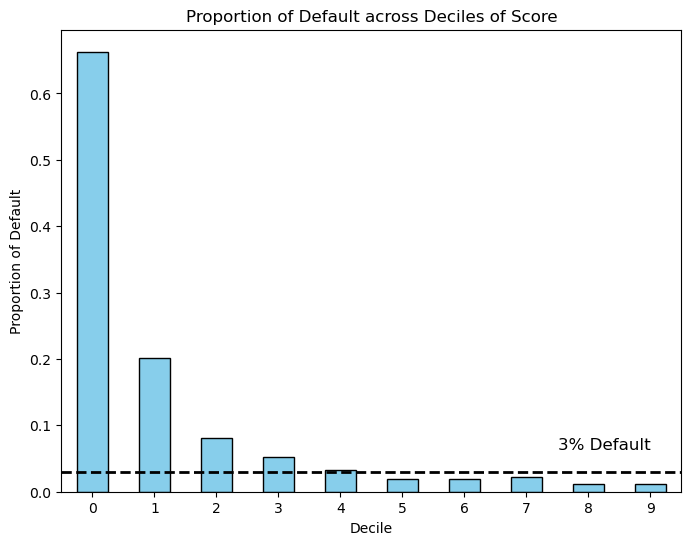

In [20]:
final_val["score"] = final_scorecard.score(final_val)
final_val['decile'] = pd.qcut(final_val["score"], 10, labels = False)

PD = final_val[final_val['GB'] == 1].groupby('decile').size() / (final_val[final_val['GB'] == 0].groupby('decile').size() * 30 + final_val[final_val['GB'] == 1].groupby('decile').size())


plt.figure(figsize = (8, 6))
PD.plot(kind = 'bar', color = 'skyblue', edgecolor = 'black')
plt.axhline(y = 0.03, color = 'black', linestyle = '--', linewidth = 2)
plt.text(x = 9, y = 0.06, s = '3% Default', color = 'black', ha = 'right', va = 'bottom', fontsize = 12)

plt.title('Proportion of Default across Deciles of Score')
plt.xlabel('Decile')
plt.ylabel('Proportion of Default')
plt.xticks(rotation = 0)